In [1]:
import csv

birds_dataset = list()
with open('birds_dataset_alias.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            birds_dataset.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

birds_dataset_strings = list()
with open('birds_dataset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            birds_dataset_strings.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are bird_id, theme, head, eyes, body, tail, wingLeft, wingRight, feet, beak
Processed 8479 lines.
Column names are bird_id, theme, head, eyes, body, tail, wingLeft, wingRight, feet, beak
Processed 8479 lines.


In [2]:
from collections import Counter
import numpy as np

birds_dataset = np.array(birds_dataset, dtype='int32')
birds_dataset_strings = np.array(birds_dataset_strings)

In [3]:
print('The same eyes and beak have', np.sum(birds_dataset[:, 3] == birds_dataset[:, 9]), 'birds')
var_eyes_number = 0
var_beak_number = 0
for bird_index in range(len(birds_dataset)):
    if (birds_dataset_strings[bird_index, 3].find('var') != -1):
        var_eyes_number = var_eyes_number + 1
    if (birds_dataset_strings[bird_index, 9].find('var') != -1):
        var_beak_number = var_beak_number + 1
print('Var eyes have', var_eyes_number, 'birds.')
print('Var beak have', var_beak_number, 'birds.')
# print(7612 + 221 + 645 - len(birds_dataset))

The same eyes and beak have 7612 birds
Var eyes have 221 birds.
Var beak have 645 birds.


In [4]:
# eyes != beak => one and only one starts with 'var'
for bird_index in range(len(birds_dataset)):
    if birds_dataset[bird_index, 3] != birds_dataset[bird_index, 9]:
        if (birds_dataset_strings[bird_index, 3].find('var') == -1) and (birds_dataset_strings[bird_index, 9].find('var') == -1):
            print([birds_dataset_strings[bird_index, 3], birds_dataset_strings[bird_index, 9]])
for bird_index in range(len(birds_dataset)):
    if (birds_dataset_strings[bird_index, 3].find('var') != -1) and (birds_dataset_strings[bird_index, 9].find('var') != -1):
        print([birds_dataset_strings[bird_index, 3], birds_dataset_strings[bird_index, 9]])
for bird_index in range(len(birds_dataset)):
    if (birds_dataset_strings[bird_index, 3].find('var') != -1) and (birds_dataset_strings[bird_index, 9].find('var') != -1):
        print([birds_dataset_strings[bird_index, 3], birds_dataset_strings[bird_index, 9]])

1856


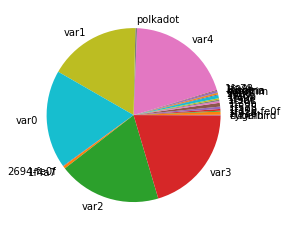

In [5]:
import matplotlib.pyplot as plt

sets_5_number = 0
set_5_list = list()
for bird_index in range(len(birds_dataset)):
    current_list = list(birds_dataset_strings[bird_index, (2, 4, 5, 6, 7)])
    if (current_list.count(current_list[0]) == len(current_list)):
        sets_5_number = sets_5_number + 1
        set_5_list.append(current_list[0])
print(sets_5_number)
entries = Counter(set_5_list)
plt.pie(entries.values(), labels = entries.keys())
plt.show()

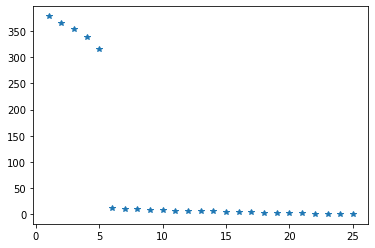

In [6]:
plt.plot(range(1, len(list(entries.values())) + 1), np.sort(list(entries.values()))[::-1], '*')

7
436
3040


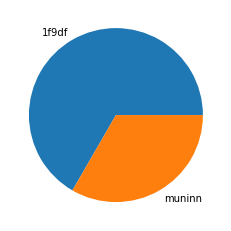

In [7]:
import matplotlib.pyplot as plt

sets_number = 0
set_list = list()
for bird_index in range(len(birds_dataset)):
    current_list = list(birds_dataset_strings[bird_index, (2, 3, 4, 5, 6, 7, 8, 9)])
    if (current_list.count(current_list[0]) == len(current_list)):
        sets_number = sets_number + 1
        set_list.append(current_list[0])
        print(birds_dataset_strings[bird_index, 0])
entries = Counter(set_list)
plt.pie(entries.values(), labels = entries.keys())
plt.show()

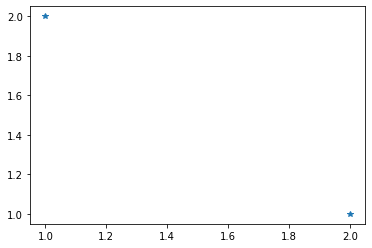

In [8]:
plt.plot(range(1, len(list(entries.values())) + 1), np.sort(list(entries.values()))[::-1], '*')

[set size, count]
[[6, 1856], [3, 931], [4, 1572], [5, 4119]]


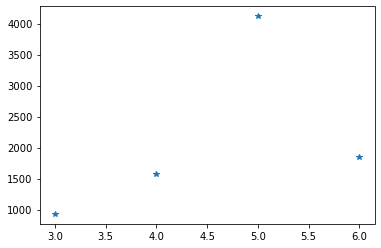

In [9]:
set_strings = list()
set_size = list()
for bird_index in range(len(birds_dataset)):
    current_list = list(birds_dataset_strings[bird_index, (2, 4, 5, 6, 7, 8)])
    entries = Counter(current_list)
    max_key = max(entries, key=entries.get)
    set_strings.append(max_key)
    set_size.append(entries[max_key])
    if entries[max_key] == 2:
        print(birds_dataset_strings[bird_index, 0])
entries = Counter(set_size)
plt.plot(list(entries.keys()), list(entries.values()), '*')
print('[set size, count]')
print([[x, entries[x]] for x in entries.keys()])

In [10]:
def get_scores(birds_dataset):
    nfts_number = len(birds_dataset)
    columns_number = len(birds_dataset[0])
    birds_scores = np.zeros((nfts_number,))
    for column_index in range(columns_number):
        bird_traits = birds_dataset[:, column_index]
        entries = Counter(bird_traits)
        bird_group_sizes = np.array([entries[x] for x in bird_traits]).reshape((nfts_number, 1))
        keys = entries.keys()
        values = np.array(list(entries.values()))
        groups_number = len(values)
        values = values.reshape((1, len(values)))
        birds_scores = birds_scores + (np.sum(np.divide((values + np.zeros((nfts_number, 1))), (bird_group_sizes + values)), 1) - 1/2) / groups_number  
    return birds_scores / columns_number

In [11]:
birds_scores = get_scores(birds_dataset[:, 1:])
birds_trait_scores = birds_scores

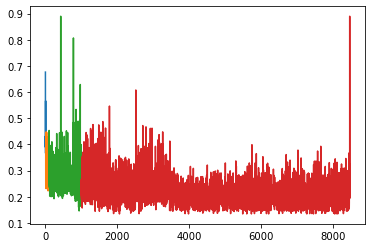

In [12]:
import matplotlib.pyplot as plt

nfts_number = len(birds_dataset)
boundries = [0, 10, 100, 1000, 10000]
rarity_groups = 4
ids = np.arange(nfts_number)
for rarity_index in range(rarity_groups):
    indexes = ids[(ids >= boundries[rarity_index]) * (ids < boundries[rarity_index + 1])]
    plt.plot(ids[indexes], birds_scores[indexes])

In [13]:
with open('scores.csv', 'w', newline='') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    birds_scores = birds_scores.reshape((nfts_number, 1))
    write.writerows(birds_scores)

In [14]:
# test
birds_scores = get_scores(np.array([[1, 1, 1],
                           [2, 2, 2],
                           [2, 2, 2],
                           [2, 2, 2]]))
print(birds_scores)

[0.375 0.125 0.125 0.125]


## Sets without vars

[different non-var subsets, count]
[[1, 1801], [2, 6488], [3, 189]]


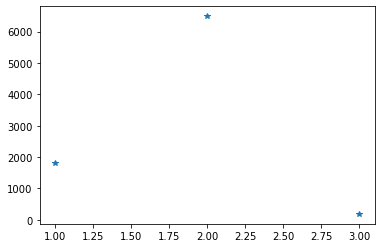

In [43]:
set_strings = list()
set_sizes = list()
max_set_sizes = list()
var_set_strings = list()
var_set_sizes = list()
birds_6_2 = list()
for bird_index in range(len(birds_dataset)):
    current_list = list(birds_dataset_strings[bird_index, (2, 4, 5, 6, 7, 8)])
    entries = Counter(current_list)
    current_set_strings = list()
    current_set_sizes = list()
    current_var_set_strings = list()
    current_var_set_sizes = list()
    for set_string in list(entries.keys()):
        if (set_string.find('var') == -1):
            current_set_strings.append(set_string)
            current_set_sizes.append(entries[set_string])
        else:
            current_var_set_strings.append(set_string)
            current_var_set_sizes.append(entries[set_string])
    if (len(current_set_sizes) == 2) and (current_set_sizes == [6, 2]):
        birds_6_2.append(bird_index)
    set_strings.append(current_set_strings)
    set_sizes.append(current_set_sizes)
    var_set_strings.append(current_var_set_strings)
    var_set_sizes.append(current_var_set_sizes)
    if not current_set_strings:
        max_set_sizes.append(0)
    elif isinstance(current_set_sizes, list):
        max_set_sizes.append(max(current_set_sizes))
    else:
        max_set_sizes.append(current_set_sizes)
        

    
import matplotlib.pyplot as plt

entries = Counter(max_set_sizes)
plt.plot(list(entries.keys()), list(entries.values()), '*')
print('[different non-var subsets, count]')
print([[x, entries[x]] for x in entries.keys()])
data_for_sets = [[x, entries[x]] for x in entries.keys()]

In [42]:
data_for_sets = sorted(data_for_sets, key=lambda x:x[0], reverse=True)
for index in range(1, len(data_for_sets)):
    data_for_sets[index][1] = data_for_sets[index][1] + data_for_sets[index - 1][1]
print(data_for_sets)

[[6, 105], [5, 106], [4, 129], [3, 957], [2, 2607], [1, 6727], [0, 8478]]


In [32]:
for bird_index in range(len(birds_dataset)):
    if max_set_sizes[bird_index] == 4:
        print(birds_dataset[bird_index, 0])

40
41
54
116
146
191
396
403
505
530
592
728
744
754
762
781
793
803
806
815
822
1876
1908


In [18]:
# 6_2 sets aren't full?

print(len(birds_6_2))
print('bird_id, trait_1, trait_2')
for bird_id in birds_6_2:
    current_bird = birds_dataset_strings[bird_id, :]
    print(current_bird[0], current_bird[2], current_bird[3])
    assert all([x == current_bird[2] for x in current_bird[[2, 4, 5, 6, 7, 8]]]), birds_dataset_strings[bird_id, 0]
    assert all([x == current_bird[3] for x in current_bird[[3, 9]]]), birds_dataset_strings[bird_id, 0]

0
bird_id, trait_1, trait_2


Sets with vars

In [ ]:
entries = Counter([len(x) for x in var_set_sizes])
plt.plot(list(entries.keys()), list(entries.values()), '*')
print('[different var subsets, count]')
print([[x, entries[x]] for x in entries.keys()])

### Non-var sets index

In [ ]:
set_sizes = [sorted(x)[::-1] for x in set_sizes]
set_sizes_strings = [''.join(str(e)+', ' for e in x) for x in set_sizes]
set_sizes_strings = [x[:-2] for x in set_sizes_strings]

In [ ]:
entries = Counter(set_sizes_strings)
entries_dict = dict(entries)
entries_dict = sorted( ((v,k) for k,v in entries_dict.items()), reverse=True)
print('''
Different non-var subsets
[count, structure]''')
print(entries_dict)
plt.plot([x[0] for x in entries_dict], '*')
plt.xticks(np.arange(len(entries_dict)), [x[1] for x in entries_dict], rotation=90)
plt.show()

In [ ]:
sorted(entries.values())

In [ ]:
def get_harmony_scores(birds_dataset):
    nfts_number = len(birds_dataset)
    columns_number = len(birds_dataset[0])
    birds_scores = np.zeros((nfts_number,))
    
    set_sizes = list()
    for bird_index in range(len(birds_dataset)):
        current_list = list(birds_dataset_strings[bird_index, (2, 3, 4, 5, 6, 7, 8, 9)])
        entries = Counter(current_list)
        current_set_sizes = list()
        for set_string in list(entries.keys()):
            if (set_string.find('var') == -1):
                current_set_sizes.append(entries[set_string])
        set_sizes.append(current_set_sizes)
    set_sizes = [sorted(x)[::-1] for x in set_sizes]
    set_sizes_strings = [''.join(str(e)+', ' for e in x) for x in set_sizes]
    set_sizes_strings = [x[:-2] for x in set_sizes_strings]
    entries = Counter(set_sizes_strings)
    bird_group_sizes = np.array([entries[x] for x in set_sizes_strings]).reshape((nfts_number, 1))
    keys = entries.keys()
    values = np.array(list(entries.values()))
    groups_number = len(values)
    values = values.reshape((1, len(values)))
    birds_scores = birds_scores + (np.sum(np.divide((values + np.zeros((nfts_number, 1))), (bird_group_sizes + values)), 1) - 1/2) / groups_number
    return birds_scores

In [ ]:
birds_harmony_scores = get_harmony_scores(birds_dataset)

In [ ]:
def get_edition_scores(birds_dataset):
    nfts_number = len(birds_dataset)
    borders = [10, 100, 1000]
    
    birds_scores = np.zeros((nfts_number,))
    edition_trait = np.zeros((nfts_number,))
    for current_border in borders:
        edition_trait = edition_trait + (birds_dataset[:, 0] < current_border)
    entries = Counter(edition_trait)
    bird_group_sizes = np.array([entries[x] for x in edition_trait]).reshape((nfts_number, 1))
    keys = entries.keys()
    values = np.array(list(entries.values()))
    groups_number = len(values)
    values = values.reshape((1, len(values)))
    birds_scores = birds_scores + (np.sum(np.divide((values + np.zeros((nfts_number, 1))), (bird_group_sizes + values)), 1) - 1/2) / groups_number
    return birds_scores

In [ ]:
birds_edition_scores = get_edition_scores(birds_dataset)
np.shape(birds_edition_scores)

In [ ]:
import scipy.stats as ss

nfts_number = len(birds_dataset)

birds_trait_ranks = (nfts_number + 1) - ss.rankdata(birds_trait_scores, method='max')
birds_trait_ranks = [int(x) for x in birds_trait_ranks]

birds_harmony_ranks = (nfts_number + 1) - ss.rankdata(birds_harmony_scores, method='max')
birds_harmony_ranks = [int(x) for x in birds_harmony_ranks]

birds_edition_ranks = (nfts_number + 1) - ss.rankdata(birds_edition_scores, method='max')
birds_edition_ranks = [int(x) for x in birds_edition_ranks]

In [ ]:
birds_weighted_scores = (birds_trait_scores + birds_harmony_scores + birds_edition_scores) / 3
birds_weighted_ranks = (nfts_number + 1) - ss.rankdata(birds_weighted_scores, method='max')
birds_weighted_ranks = [int(x) for x in birds_weighted_ranks]

In [ ]:
birds_dataset_with_ranks = np.hstack((birds_dataset_strings, 
                                      np.reshape(birds_trait_scores, (nfts_number, 1)),
                                      np.reshape(birds_trait_ranks, (nfts_number, 1)),
                                      np.reshape(birds_harmony_scores, (nfts_number, 1)),
                                      np.reshape(birds_harmony_ranks, (nfts_number, 1)),
                                      np.reshape(birds_edition_scores, (nfts_number, 1)),
                                      np.reshape(birds_edition_ranks, (nfts_number, 1)),
                                      np.reshape(birds_weighted_scores, (nfts_number, 1)),
                                      np.reshape(birds_weighted_ranks, (nfts_number, 1))
                                     ))

In [ ]:
column_names = ['bird_id', 'theme', 'head', 'eyes', 'body', 'tail', 'wingLeft', 'wingRight', 'feet', 'beak',
                'trait_score', 'trait_rank', 'harmony_score', 'harmony_rank', 'edition_score', 'edition_rank', 
                'weighted_score', 'weighted_rank']

with open('birds_dataset_with_ranks.csv', 'w', newline='') as birds_file:
    bird_writer = csv.writer(birds_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    bird_writer.writerow(column_names)
    for row_index in range(len(birds_dataset_with_ranks)):
        bird_writer.writerow(birds_dataset_with_ranks[row_index])

birds_dataset_with_ranks = list()
int_columns = [0, -1, -3, -5, -7]
numeric_columns = [-2, -4, -6, -8]
with open('birds_dataset_with_ranks.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = row
            line_count += 1
        else:
            for int_element in int_columns:
                row[int_element] = int(row[int_element])
            for numeric_element in numeric_columns:
                row[numeric_element] = float(row[numeric_element])
            birds_dataset_with_ranks.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

# Visualize ranks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bird_indexes = np.array([x[0] for x in birds_dataset_with_ranks])
bird_ranks = np.array([x[-1] for x in birds_dataset_with_ranks])
borders = [0, 10, 100, 1000, 10000]

birds_scores = np.zeros((nfts_number,))
edition_trait = np.zeros((nfts_number,))
for current_border in borders:
    edition_trait = edition_trait + (bird_indexes < current_border)
edition_trait = [int(x) for x in edition_trait]
edition_collections_number = len(np.unique(edition_trait))
data = np.zeros((edition_collections_number, edition_collections_number))
for row in range(edition_collections_number):
    for column in range(edition_collections_number):
        for bird_index in range(len(bird_indexes)):
            if ((bird_indexes[bird_index] >= borders[column]) and 
                (bird_indexes[bird_index] < borders[column + 1]) and
                (bird_ranks[bird_index] >= borders[row]) and
                (bird_ranks[bird_index] < borders[row + 1])
               ):
                data[row, column] = data[row, column] + 1
columns = ('Among 1-9', '10-99', '100-999', '1000-9999')
rows = ['Super Founder', 'Founder', 'Rare', 'Limited Edition']

# Get some pastel shades for the colors
colors = ['orange', 'blueviolet', 'blue', 'limegreen']# plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(data, columns=columns, index=rows).astype(int)

ax.table(cellText=df.values, rowLabels=rows, rowColours=colors, colLabels=df.columns, colColours=colors, loc='center')

fig.tight_layout()

plt.show()